In [1]:
import numpy as np
from layers import Dense
from losses import CategoricalCrossentropy
from activations import ReLU, Softmax
from accuracy import Categorical
from models import Model
from optimizers import Adam
from datagen import spiral
from utils import plot_history
import matplotlib.pyplot as plt

In [2]:
X, y = spiral(1000, 3)
X_test, y_test = spiral(100, 3)

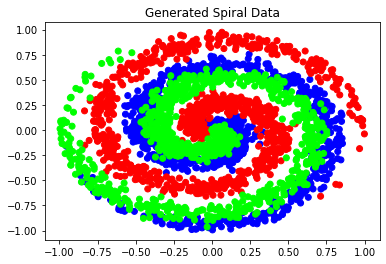

In [3]:
plt.scatter(X[:,0], X[:,1], c=y, cmap="brg")
plt.title("Generated Spiral Data")
plt.show()

In [4]:
model = Model()

model.add(Dense(2, 64, L2w=5e-4, L2b=5e-4))
model.add(ReLU())
model.add(Dense(64, 3))
model.add(Softmax())

model.set(
    loss=CategoricalCrossentropy(), 
    optimizer=Adam(lr=0.02, decay=5e-7, epsilon=1e-7, beta1=0.9, beta2=0.999), 
    accuracy_fn=Categorical()
)

In [5]:
history = model.train(X, y, 1000, print_every=None)

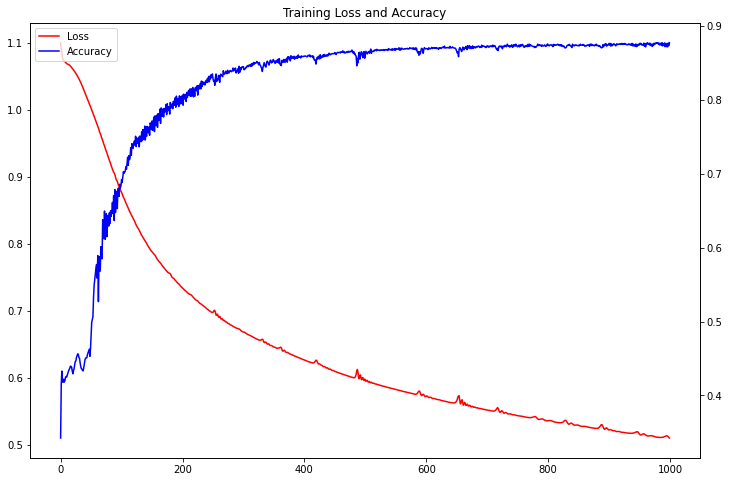

In [6]:
plot_history(history)



In [7]:
yhat = model.predict(X_test)


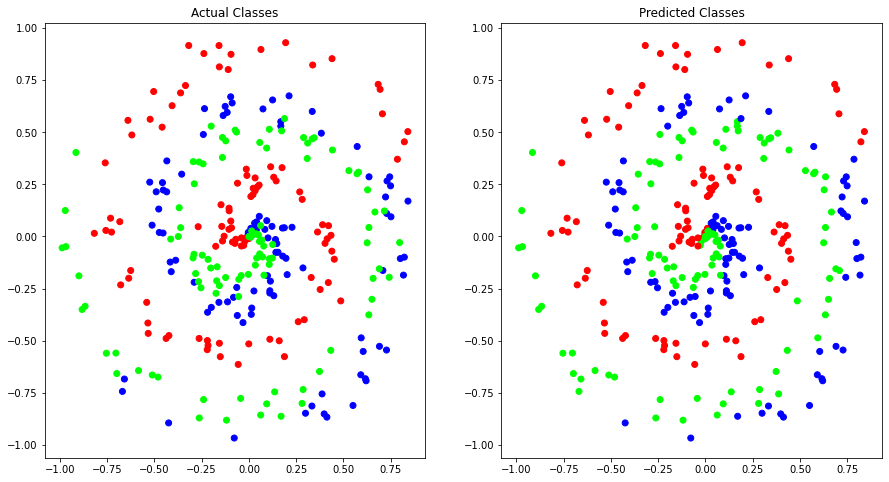

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
axes[0].scatter(X_test[:,0], X_test[:,1],c=y_test, cmap="brg")
axes[0].title.set_text("Actual Classes")

axes[1].scatter(X_test[:,0], X_test[:,1],c=yhat, cmap="brg")
axes[1].title.set_text("Predicted Classes")
